# Bibliotecas

In [53]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ¿Qué tenemos?

In [54]:
#TestSet
train_df = pd.read_csv("train_set.csv")
train_df.head()

,id_img,path,label
0,0,../data/images/train/angry\0.jpg,angry
1,1,../data/images/train/angry\1.jpg,angry
2,10,../data/images/train/angry\10.jpg,angry
3,10002,../data/images/train/angry\10002.jpg,angry
4,10016,../data/images/train/angry\10016.jpg,angry


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28821 entries, 0 to 28820
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_img  28821 non-null  int64 
 1   path    28821 non-null  object
 2   label   28821 non-null  object
dtypes: int64(1), object(2)
memory usage: 675.6+ KB


In [56]:
train_df["path"]

0              ../data/images/train/angry\0.jpg
1              ../data/images/train/angry\1.jpg
2             ../data/images/train/angry\10.jpg
3          ../data/images/train/angry\10002.jpg
4          ../data/images/train/angry\10016.jpg
                          ...                  
28816    ../data/images/train/surprise\9969.jpg
28817    ../data/images/train/surprise\9985.jpg
28818    ../data/images/train/surprise\9990.jpg
28819    ../data/images/train/surprise\9992.jpg
28820    ../data/images/train/surprise\9996.jpg
Name: path, Length: 28821, dtype: object

In [57]:
train_df['label'].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

### Si ya hay desbalance aquí puede que lo haya en train.csv pero primero...

## ¿Relación entre test.csv/test_set.csv?

In [58]:
test_set = pd.read_csv("test_set.csv")
print(len(test_set))

7066


In [59]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id_img  7066 non-null   int64
dtypes: int64(1)
memory usage: 55.3 KB


In [60]:
ejemplo_df = pd.read_csv("sample_submision.csv")
len(ejemplo_df)

7066

In [ ]:
def read_data_test(path, im_size):
    X = []

    #Surfeamos todos los archivos del directorio
    for file in os.listdir(path):
        image_path = os.path.join(path, file)

        #Filtrar por extensión
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  #Apriori ya vimos que son .jpg
            try:
                #Cargar la imagen
                img = Image.open(image_path).convert('L')  #Convertir a escala de grises (ayuda al modelo)
                img = img.resize(im_size)  #Redimensionar la imagen
                
                #Convertir la imagen a un array
                img_array = np.array(img)
                X.append(img_array)

            except Exception as e:
                print(f"Error al leer {image_path}: {e}")

    return np.array(X)

In [62]:
IMAGE_SIZE = (48, 48)
TEST_PATH = "C:\\Users\\Jjaavviieerroperro\\Desktop\\Bootcamp DS\\RepositoriosGitHub\\CompeticionesKaggleML\\kgl_competitions\\EmoDecode5000\\data\\data\\images\\test"

In [63]:
X_test_test = read_data_test(TEST_PATH, IMAGE_SIZE)
print(f"Tamaño de X_test: {X_test_test.shape}")

Tamaño de X_test: (7066, 48, 48)


## Conclusión:

Test_set sirve para darle indice a la predicción sobre test

# Visualizar Imagenes

In [64]:
#Lista de emociones
class_names = ['happy', 'neutral', 'sad', 'fear', 'angry', 'surprise', 'disgust']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [65]:
TRAIN_PATH = "C:\\Users\\Jjaavviieerroperro\\Desktop\\Bootcamp DS\\RepositoriosGitHub\\CompeticionesKaggleML\\kgl_competitions\\EmoDecode5000\\data\\data\\images\\train"

In [ ]:
#Función para recorrer los datos
def read_data(path, im_size, class_names_label):

    X = []
    y = []

    #Surfeamos las carpetas
    for folder in os.listdir(path):
        print(f"Recorriendo la carpeta {folder}...")

        if folder not in class_names_label:
            continue  
        
        label = class_names_label[folder]  #Asignamos la etiqueta a la emoción
        folder_path = os.path.join(path, folder)
        
        #Surfeamos las imágenes
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            
            try:
                #Cargamos la imagen
                img = Image.open(image_path).convert('L')  #'L' --> convertir a escala de grises
                img = img.resize(im_size)

                img_array = np.array(img) #convertir a array

                X.append(img_array)
                y.append(label)

            except Exception as e: 
                print(f"Error al leer {image_path}: {e}")

    return np.array(X), np.array(y)


In [ ]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)

Recorriendo la carpeta angry...
Recorriendo la carpeta disgust...
Recorriendo la carpeta fear...
Recorriendo la carpeta happy...
Recorriendo la carpeta neutral...
Recorriendo la carpeta sad...
Recorriendo la carpeta surprise...


# Extra: se podría recorrer las carpetas usando un keras.utils (para otra ocasión)

In [68]:
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")


Forma de X_train: (28821, 48, 48)
Forma de y_train: (28821,)


In [69]:
pd.Series(y_train).value_counts()

0    7164
1    4982
2    4938
3    4103
4    3993
5    3205
6     436
Name: count, dtype: int64

# Mostramos las imagenes

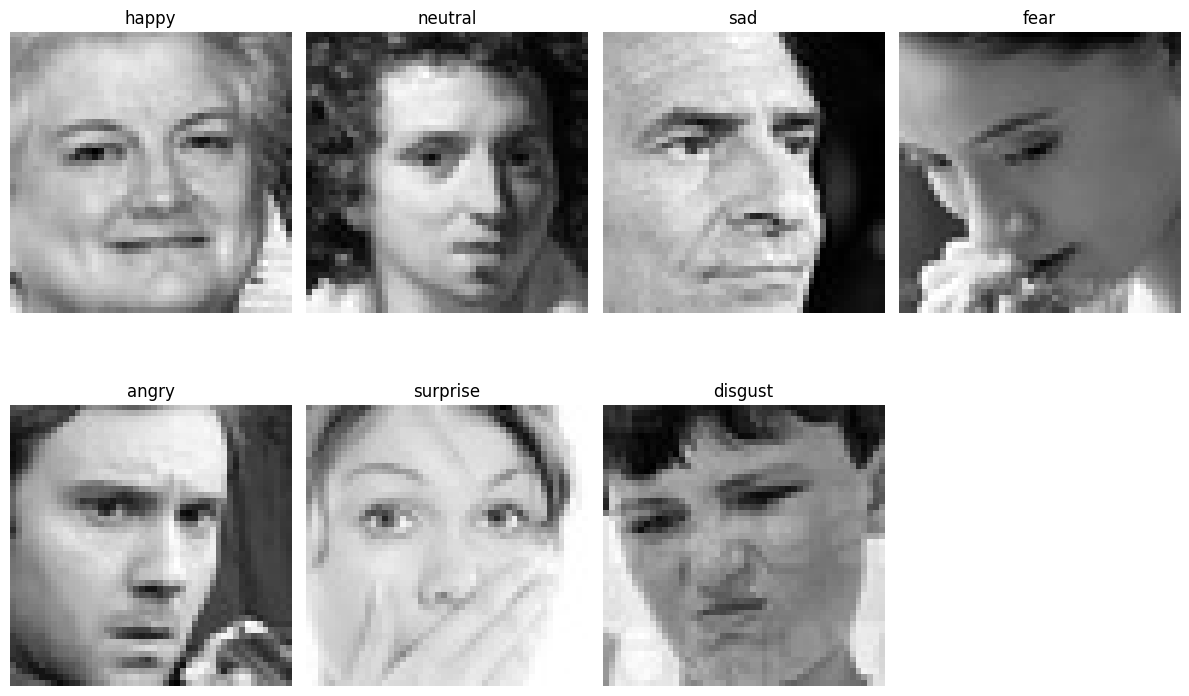

In [88]:
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names):

    plt.subplot(2, 4, i + 1) #Subploteamos para cargarlas juntas

    sample_img = X_train[y_train == class_names_label[class_name]][0]  #Cogemos la primera de cada emoción
    plt.imshow(sample_img, cmap='gray') 
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout();


# Está balanceado?

In [ ]:
image_counts = {} #Lista vacía para el conteo

#Recorremos las imágenes de cada carpeta de train
for class_name in class_names:
    class_folder_path = os.path.join(TRAIN_PATH, class_name)
    
    if os.path.isdir(class_folder_path):  
        image_count = len(os.listdir(class_folder_path))  
        image_counts[class_name] = image_count
    else:
        print(f"Advertencia: La carpeta {class_name} no existe o está vacía.")  #Evaluación errores siempre por si

#Conteo
for class_name, count in image_counts.items():
    print(f"{class_name}: {count} imágenes")


happy: 7164 imágenes
neutral: 4982 imágenes
sad: 4938 imágenes
fear: 4103 imágenes
angry: 3993 imágenes
surprise: 3205 imágenes
disgust: 436 imágenes


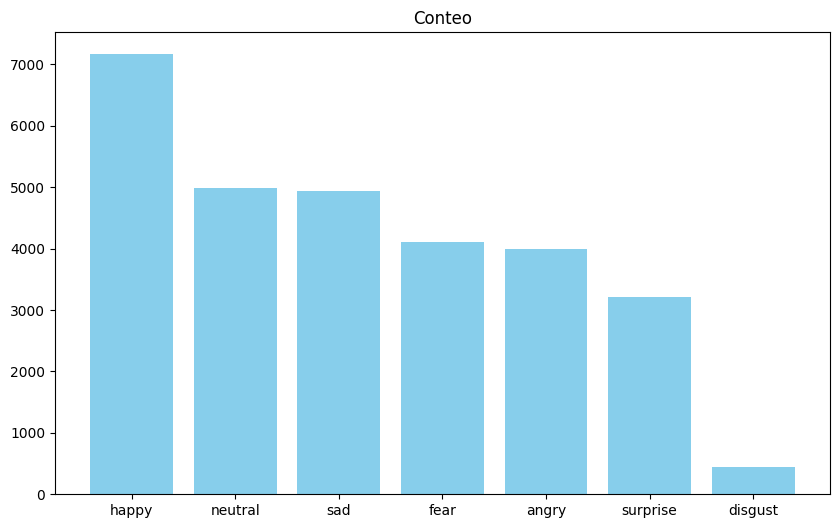

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.title('Conteo');

# Normalizamos las imagenes

Para ayudar al modelo

In [73]:
X_train = X_train.astype('float32') / 255.0

In [74]:
print(X_train.shape)

(28821, 48, 48)


### Train/test del train

In [75]:
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [76]:
print(f"Forma de X_train_train: {X_train_train.shape}")
print(f"Forma de X_train_test: {X_test_train.shape}")
print(f"Forma de y_train_train: {y_train_train.shape}")
print(f"Forma de y_test_test: {y_test_train.shape}")

Forma de X_train_train: (23056, 48, 48)
Forma de X_train_test: (5765, 48, 48)
Forma de y_train_train: (23056,)
Forma de y_test_test: (5765,)


# Primera Red Neuronal Convolucional tipica clasificacion de imágenes

Sin tocar el desbalanceo

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
model_tipico = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  #Más la capa inicial
                                  layers.MaxPooling2D((2, 2)),

                                  layers.Conv2D(64, (3, 3), activation='relu'),
                                  layers.MaxPooling2D((2, 2)),

                                  layers.Conv2D(64, (3, 3), activation='relu'),
                                  layers.MaxPooling2D((2, 2)),

                                  layers.Flatten(),

                                  layers.Dense(64, activation='relu'),
                                  layers.Dense(7, activation='softmax')])

## Chuleta ( por capas )
1. - **Conv2D (32 filtros, tamaño 3x3):**
Detecta los patrones simples en la imagen (como bordes, líneas o texturas)   
    - **Relu:** Ayuda a eliminar valores negativos
    - **MaxPooling2D (2x2):**  Reduce el tamaño de la imagen a la mitad

2. - **Conv2D (64 filtros, tamaño 3x3):**  Busca patrones más complejos  
    - **MaxPooling2D (2x2):**  Reduce el tamaño de la imagen a la mitad

3. - Volvemos a repetir la convolucional 2

4. - **Flaten:** Aplana de tridimensional a vector(una sola dimensión)

5. - **Dense:** capa densa 64 neuronas, busca las combinaciones útiles

6. - **Dense:** capa salida de 7 neuronas, una por cada clase
    - **Softmax:** Busca la categoría más probable

In [ ]:
model_tipico.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,799 (475.78 KB)

 Trainable params: 121,799 (475.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_tipico.compile(optimizer=Adam(),
                    loss='sparse_categorical_crossentropy',  #Usamos 'sparse_categorical_crossentropy' porque nuestras etiquetas están en formato entero
                    metrics=['accuracy'])

In [37]:
early_stopping = EarlyStopping(monitor='val_accuracy',  
                               patience=5,           
                               restore_best_weights=True)

In [ ]:
# Entrenamos el modelo
history = model_tipico.fit(X_train_train, y_train_train, 
                            epochs=20,  
                            batch_size=32,  
                            validation_data=(X_test_train, y_test_train),
                            callbacks=[early_stopping])  



Epoch 1/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.2561 - loss: 1.8037 - val_accuracy: 0.3868 - val_loss: 1.5803
Epoch 2/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.4170 - loss: 1.5159 - val_accuracy: 0.4574 - val_loss: 1.4226
Epoch 3/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.4744 - loss: 1.3797 - val_accuracy: 0.4840 - val_loss: 1.3601
Epoch 4/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5128 - loss: 1.2915 - val_accuracy: 0.4926 - val_loss: 1.3149
Epoch 5/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5362 - loss: 1.2267 - val_accuracy: 0.5003 - val_loss: 1.3107
Epoch 6/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.5557 - loss: 1.1726 - val_accuracy: 0.5252 - val_loss: 1.2577
Epoch 7/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5717 - loss: 1.1341 - val_accuracy: 0.5212 - val_loss: 1.2551
Epoch 8/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.5867 - loss: 1.0911 - 

In [ ]:
#Guardar Modelo
model_tipico.save('Modelos/modelo_tipico.h5')

# Importarlo
# from tensorflow.keras.models import load_model
# model_cargado = load_model('Modelos/modelo_tipico.h5')

In [ ]:
test_loss, test_acc = model_tipico.evaluate(X_test_train, y_test_train)
print(f"Accuracy en el conjunto de prueba: {test_acc}")
print(f"Pérdida en el conjunto de prueba: {test_loss}")

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5189 - loss: 1.2394
Accuracy en el conjunto de prueba: 0.5212489366531372
Pérdida en el conjunto de prueba: 1.255131721496582


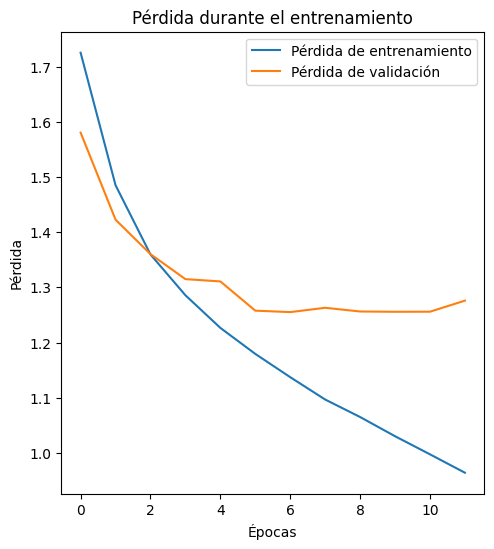

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

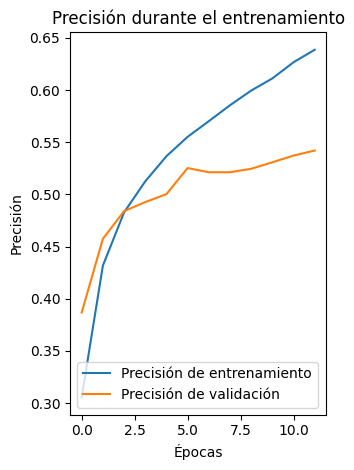

In [ ]:
#Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout();

# Primero asociar Test y test_set como índice

In [77]:
test_set.head()

,id_img
0,10052
1,10065
2,10079
3,10095
4,10121


In [ ]:
#Crear un diccionario con el mapeo de los índices y las etiquetas
image_names = test_set['id_img'].tolist()

In [79]:
image_names

[10052,
 10065,
 10079,
 10095,
 10121,
 10148,
 10163,
 10215,
 1024,
 10286,
 10315,
 10336,
 10338,
 10371,
 10382,
 10399,
 10415,
 10426,
 10551,
 10554,
 10583,
 10699,
 10702,
 1071,
 10743,
 10746,
 10818,
 10823,
 10825,
 10839,
 10854,
 10970,
 11002,
 11017,
 11024,
 11028,
 1106,
 11075,
 11093,
 11096,
 11158,
 11169,
 11186,
 11188,
 11200,
 1124,
 11266,
 1127,
 11337,
 11342,
 11400,
 11421,
 11467,
 11561,
 11610,
 11613,
 11632,
 11642,
 11675,
 11694,
 1177,
 11813,
 11841,
 11849,
 11883,
 11949,
 11964,
 11986,
 12136,
 12144,
 1215,
 12171,
 12183,
 12230,
 12237,
 12307,
 1235,
 12352,
 12489,
 12680,
 12695,
 12733,
 12808,
 12810,
 12841,
 12842,
 12851,
 12928,
 12945,
 13029,
 13041,
 13057,
 13059,
 13092,
 13118,
 13167,
 13220,
 13267,
 13279,
 13334,
 13351,
 13376,
 13395,
 1340,
 13431,
 1350,
 13514,
 13533,
 13535,
 1358,
 13582,
 13599,
 13607,
 13671,
 13672,
 13738,
 13758,
 1386,
 13890,
 13978,
 14022,
 14030,
 14058,
 14108,
 14118,
 14120,
 141

In [ ]:
def load_and_preprocess_images(test_path, image_names, im_size):
    X_test = []
    
    # Recorrer la lista de nombres de imágenes
    for image_name in image_names:

        image_name = str(image_name) + '.jpg'  #Ajusta la extensión de la imagen si es necesario
        

        image_path = os.path.join(test_path, image_name)
        
        try:

            img = Image.open(image_path).convert('L')  #Convertir a escala de grises
            img = img.resize(im_size) 
            
            img_array = np.array(img) / 255.0  #Normalizamos también el test
            X_test.append(img_array)
            
        except Exception as e:
            print(f"Error al cargar la imagen {image_name}: {e}") #Evaluación de errores
    
    return np.array(X_test)



In [81]:
X_test = load_and_preprocess_images(TEST_PATH, image_names, IMAGE_SIZE)
print(f"Forma de X_test: {X_test.shape}")  #(7066, 48, 48)


Forma de X_test: (7066, 48, 48)


In [82]:
X_test = X_test.reshape(-1, IMAGE_SIZE[0], IMAGE_SIZE[1], 1)  #(N, 48, 48, 1)

In [83]:
X_test

array([[[[0.22745098],
         [0.25882353],
         [0.2745098 ],
         ...,
         [0.2       ],
         [0.18431373],
         [0.1372549 ]],

        [[0.24313725],
         [0.25098039],
         [0.28627451],
         ...,
         [0.23137255],
         [0.2       ],
         [0.16470588]],

        [[0.25882353],
         [0.27058824],
         [0.34117647],
         ...,
         [0.22745098],
         [0.21176471],
         [0.20784314]],

        ...,

        [[0.03137255],
         [0.05882353],
         [0.0745098 ],
         ...,
         [0.01960784],
         [0.02745098],
         [0.03137255]],

        [[0.02352941],
         [0.05490196],
         [0.06666667],
         ...,
         [0.01568627],
         [0.02745098],
         [0.03921569]],

        [[0.03137255],
         [0.05882353],
         [0.07843137],
         ...,
         [0.01960784],
         [0.02745098],
         [0.03529412]]],


       [[[0.09019608],
         [0.10196078],
         [0.08

# Hacemos la Predicción

In [ ]:
predictions = model_tipico.predict(X_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

predicted_df = pd.DataFrame({'id_img': image_names,
                             'label': predicted_labels})

predicted_df.head()


,id_img,label
0,10052,neutral
1,10065,fear
2,10079,sad
3,10095,angry
4,10121,angry


In [ ]:
predicted_df.to_csv('Pruebas/prueba_1.csv', index=False)

# Modelo 2 (Usando balanceo de classe "class_weights")

In [ ]:
from sklearn.utils import class_weight

In [ ]:
model_2 = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                            layers.MaxPooling2D((2, 2)),

                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),

                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),

                            layers.Flatten(),

                            layers.Dense(64, activation='relu'),
                            layers.Dense(7, activation='softmax')])

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_2.compile(optimizer=Adam(),
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])

### Aquí:

In [ ]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_train), y=y_train_train)

In [ ]:
class_weight_dict = dict(enumerate(class_weights))
print("Pesos de clases: ", class_weight_dict)

#Darle el peso que merece a cada clase

Pesos de clases:  {0: np.float64(0.5822369251748781), 1: np.float64(0.8256992443505354), 2: np.float64(0.8269430795165166), 3: np.float64(1.0041811846689896), 4: np.float64(1.02162353775257), 5: np.float64(1.2766334440753044), 6: np.float64(9.602665556018326)}


In [ ]:
history = model_2.fit(X_train_train, y_train_train, 
                            epochs=20,  
                            batch_size=32,  
                            validation_data=(X_test_train, y_test_train),
                            class_weight=class_weight_dict,                  #Aplicamos los pesos de clase
                            callbacks=[early_stopping])

Epoch 1/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.1831 - loss: 1.9201 - val_accuracy: 0.2989 - val_loss: 1.8023
Epoch 2/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.3131 - loss: 1.7408 - val_accuracy: 0.3369 - val_loss: 1.6847
Epoch 3/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.4005 - loss: 1.5598 - val_accuracy: 0.4389 - val_loss: 1.4771
Epoch 4/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.4424 - loss: 1.4551 - val_accuracy: 0.4517 - val_loss: 1.4328
Epoch 5/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.4719 - loss: 1.3461 - val_accuracy: 0.4458 - val_loss: 1.4236


In [ ]:
model_2.save('Modelos/modelo_2.h5')

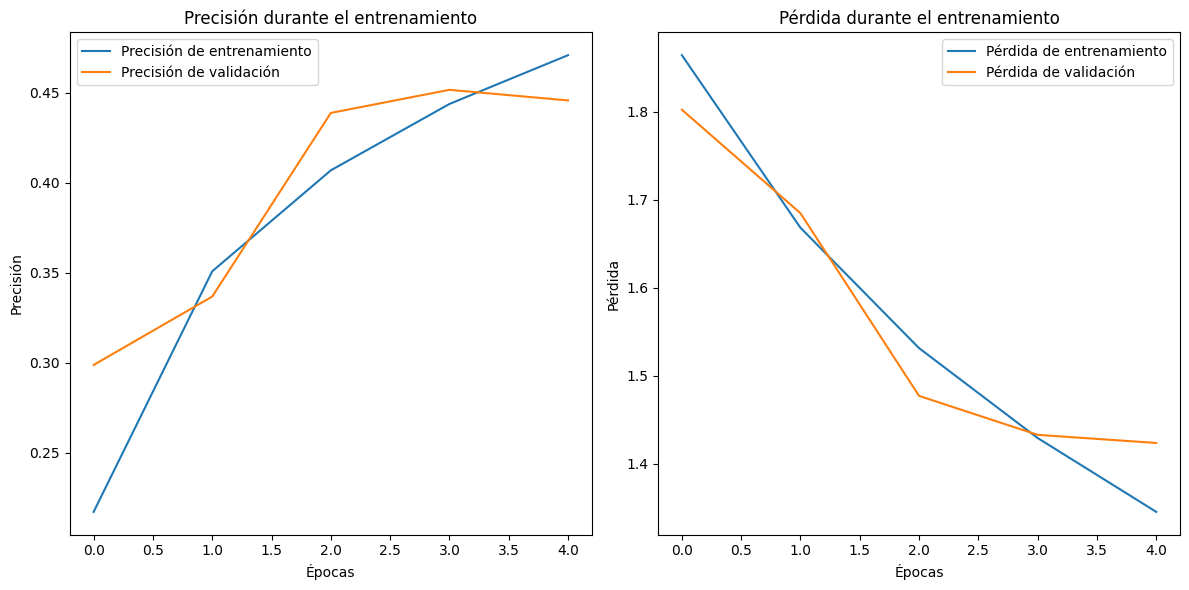

In [ ]:

plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
predictions = model_tipico.predict(X_test)

predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

predicted_df = pd.DataFrame({'id_img': image_names,
                             'label': predicted_labels})

predicted_df.head()

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


,id_img,label
0,10052,angry
1,10065,fear
2,10079,disgust
3,10095,angry
4,10121,angry


In [ ]:
predicted_df.to_csv('Pruebas/prueba_2.csv', index=False)

# Modelo Miguel clasificación paisajes adaptado

### Basicamente tiene más capa y hay mas reducciones por pixeles, con capa de dropout

In [ ]:
model_miguel = models.Sequential([layers.Conv2D(64, (3, 3), input_shape=(48, 48, 1), activation='relu'),  
                                layers.MaxPooling2D(2, 2),
                                
                                layers.Conv2D(32, (3, 3), activation='relu'),
                                layers.MaxPooling2D(2, 2),
                                
                                layers.Conv2D(32, (3, 3), activation='relu'),
                                layers.MaxPooling2D(2, 2),
                                
                                layers.Flatten(),

                                layers.Dense(64, activation='relu'),
                                layers.Dropout(0.2),                      #Regularización con dropout (evitar el overfitting)
                                
                                layers.Dense(32, activation='relu'),
                                layers.Dropout(0.2),                      #Un rango entre 0.1 y 0.3 para no afectar al modelo

                                layers.Dense(7, activation="softmax")])

model_miguel.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])

model_miguel.summary()


early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=5,  
                               restore_best_weights=True)

history = model_miguel.fit(X_train,
                    y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.1,   #Usando validation/split
                    callbacks=[early_stopping])


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,495 (248.03 KB)

 Trainable params: 63,495 (248.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 29s 136ms/step - accuracy: 0.2173 - loss: 1.8222 - val_accuracy: 0.0000e+00 - val_loss: 3.7369
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.2717 - loss: 1.6970 - val_accuracy: 0.0000e+00 - val_loss: 3.6223
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.3358 - loss: 1.6064 - val_accuracy: 0.0000e+00 - val_loss: 3.8600
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.3986 - loss: 1.5100 - val_accuracy: 0.0000e+00 - val_loss: 3.7915
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.4217 - loss: 1.4435 - val_accuracy: 0.0000e+00 - val_loss: 3.5571
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.4407 - loss: 1.4076 - val_accuracy: 0.0000e+00 - val_loss: 3.8540
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.4608 - loss: 1.3681 - val_accuracy: 0.0000e+00 - val_loss: 3.4067
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step 

In [ ]:
model_miguel.save('Modelos/modelo_miguel.h5')

In [ ]:
predictions = model_miguel.predict(X_test)

predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

predicted_df = pd.DataFrame({'id_img': image_names,
                             'label': predicted_labels})

predicted_df.head()

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


,id_img,label
0,10052,happy
1,10065,fear
2,10079,angry
3,10095,sad
4,10121,angry


In [ ]:
predicted_df.to_csv('Pruebas/prueba_3.csv', index=False)

# Modelo con Dropout (evitar overfitting)

In [ ]:
model_drop = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                                layers.MaxPooling2D((2, 2)),
                                layers.Dropout(0.2),               #DropOut

                                layers.Conv2D(64, (3, 3), activation='relu'),
                                layers.MaxPooling2D((2, 2)),
                                layers.Dropout(0.3),               #DropOut

                                layers.Conv2D(64, (3, 3), activation='relu'),
                                layers.MaxPooling2D((2, 2)),
                                layers.Dropout(0.4),               #DropOut


                                layers.Flatten(),

                                layers.Dense(64, activation='relu'),
                                layers.Dropout(0.5),               #DropOut

                                layers.Dense(7, activation='softmax')])


c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_drop.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,799 (475.78 KB)

 Trainable params: 121,799 (475.78 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_drop.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [ ]:
history = model_drop.fit(X_train_train,
                           y_train_train,
                           epochs=20,
                           batch_size=32,
                           validation_data=(X_test_train, y_test_train),
                           callbacks=[early_stopping])


Epoch 1/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.2140 - loss: 1.8569 - val_accuracy: 0.3330 - val_loss: 1.6745
Epoch 2/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.3149 - loss: 1.7011 - val_accuracy: 0.3936 - val_loss: 1.5764
Epoch 3/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.3735 - loss: 1.6065 - val_accuracy: 0.4345 - val_loss: 1.4634
Epoch 4/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4028 - loss: 1.5363 - val_accuracy: 0.4529 - val_loss: 1.4107
Epoch 5/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4205 - loss: 1.4817 - val_accuracy: 0.4703 - val_loss: 1.3693
Epoch 6/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4411 - loss: 1.4572 - val_accuracy: 0.4791 - val_loss: 1.3554
Epoch 7/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.4538 - loss: 1.4235 - val_accuracy: 0.4905 - val_loss: 1.3249
Epoch 8/20
721/721 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.4586 - loss: 1.4070 - 

In [ ]:
test_loss, test_acc = model_drop.evaluate(X_test_train, y_test_train)
print(f"Accuracy en el conjunto de prueba: {test_acc}")
print(f"Pérdida en el conjunto de prueba: {test_loss}")

181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5441 - loss: 1.1989
Accuracy en el conjunto de prueba: 0.5384215116500854
Pérdida en el conjunto de prueba: 1.2113513946533203


In [ ]:
model_drop.save('Modelos/modelo_drop.h5')

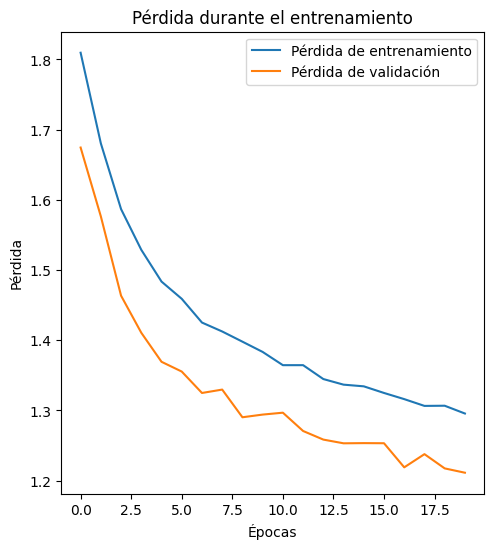

In [ ]:
# Graficar la pérdida
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

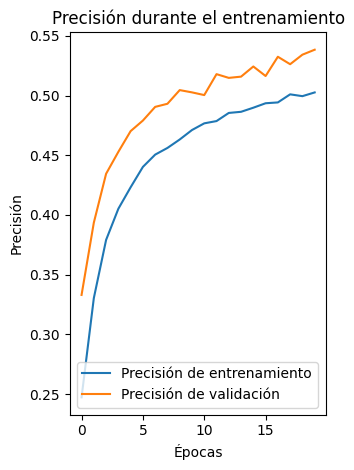

In [ ]:
# Graficar la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions = model_drop.predict(X_test)

predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

predicted_df = pd.DataFrame({'id_img': image_names,
                             'label': predicted_labels})

predicted_df.head()

221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


,id_img,label
0,10052,happy
1,10065,sad
2,10079,angry
3,10095,angry
4,10121,angry


In [ ]:
predicted_df.to_csv('Pruebas/prueba_4.csv', index=False)

# Modelo 5: Batch Normalization y Dropout en capa densa

In [ ]:
model_batch = models.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
                                layers.BatchNormalization(),  #Batch Normalization para estabilizar
                                layers.MaxPooling2D((2, 2)),

                                layers.Conv2D(64, (3, 3), activation='relu'),
                                layers.BatchNormalization(),  #Batch Normalization para estabilizar
                                layers.MaxPooling2D((2, 2)),

                                layers.Conv2D(128, (3, 3), activation='relu'),
                                layers.BatchNormalization(),  #Batch Normalization para estabilizar
                                layers.MaxPooling2D((2, 2)),

                                layers.Flatten(),

                                layers.Dense(128, activation='relu'),
                                layers.Dropout(0.1),  #Dropout reducido y solo en la capa densa

                                layers.Dense(7, activation='softmax')])


model_batch.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history = model_batch.fit(X_train_train,
                           y_train_train,
                           epochs=20,
                           batch_size=64,
                           validation_data=(X_test_train, y_test_train),
                           callbacks=[early_stopping])


test_loss, test_acc = model_batch.evaluate(X_test_train, y_test_train)
print(f"Accuracy en el conjunto de prueba: {test_acc}")
print(f"Pérdida en el conjunto de prueba: {test_loss}")


model_batch.save('Modelos/modelo_bacth.h5')

predictions = model_batch.predict(X_test)

predicted_labels = [class_names[np.argmax(pred)] for pred in predictions]

predicted_df = pd.DataFrame({'id_img': image_names,
                             'label': predicted_labels})

predicted_df.to_csv('Pruebas/prueba_5.csv', index=False)


Epoch 1/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 146ms/step - accuracy: 0.3200 - loss: 1.9065 - val_accuracy: 0.2533 - val_loss: 1.8900
Epoch 2/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 56s 155ms/step - accuracy: 0.4608 - loss: 1.3909 - val_accuracy: 0.4628 - val_loss: 1.3902
Epoch 3/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 57s 158ms/step - accuracy: 0.5303 - loss: 1.2283 - val_accuracy: 0.5004 - val_loss: 1.3052
Epoch 4/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 137ms/step - accuracy: 0.5805 - loss: 1.1042 - val_accuracy: 0.4519 - val_loss: 1.4426
Epoch 5/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 138ms/step - accuracy: 0.6239 - loss: 1.0043 - val_accuracy: 0.5280 - val_loss: 1.2518
Epoch 6/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 50s 139ms/step - accuracy: 0.6634 - loss: 0.8938 - val_accuracy: 0.5393 - val_loss: 1.2752
Epoch 7/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 53s 147ms/step - accuracy: 0.7180 - loss: 0.7545 - val_accuracy: 0.5230 - val_loss: 1.3703
Epoch 8/20
361/361 ━━━━━━━━━━━━━━━━━━━━ 51s 143ms/step - accuracy: 0.7657 - loss: 0

Accuracy en el conjunto de prueba: 0.5280138850212097
Pérdida en el conjunto de prueba: 1.2517712116241455
221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


In [36]:
predicted_df.value_counts

<bound method DataFrame.value_counts of       id_img     label
0      10052     angry
1      10065      fear
2      10079     angry
3      10095     angry
4      10121     angry
...      ...       ...
7061    9806  surprise
7062    9830     happy
7063    9853  surprise
7064    9878     happy
7065     993  surprise

[7066 rows x 2 columns]>

# Modelo 6: Resnet con transfer learning

In [48]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D


In [ ]:
#Cargar ResNet50 preentrenado, excluyendo la última capa
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 114s 1us/step


In [49]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_trans = models.Sequential([ base_model, 
                                GlobalAveragePooling2D(),  
                                layers.Dense(128, activation='relu'),  
                                layers.Dropout(0.5),  
                                layers.Dense(7, activation='softmax')])

In [ ]:
model_trans.compile(optimizer=Adam(learning_rate=0.0001),  #Tasa de aprendizaje baja para fine-tuning
                    loss='sparse_categorical_crossentropy',  
                    metrics=['accuracy'])

In [ ]:
history = model_trans.fit(X_train_train, y_train_train,
                            epochs=20,
                            batch_size=128,
                            validation_data=(X_test_train, y_test_train),
                            callbacks=[early_stopping])

# Probar ImageDataGenerator, para aumentar la cantida muestra y hacer volteos y zooms (recomencación de un amigo)

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train_train_train = np.expand_dims(X_train_train, axis=-1)   #Pasar a 4 dimensiones (num_samples, height, width, channels)
X_test_train_train = np.expand_dims(X_test_train, axis=-1)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

datagen.fit(X_train_train)  # Ajustar al conjunto de entrenamiento

history = model_batch.fit(datagen.flow(X_train_train_train,
                                        y_train_train,
                                        batch_size=128),
                                        epochs=20,
                                        validation_data=(X_test_train_train, y_test_train),
                                        callbacks=[early_stopping])